# Исследование объявлений о продаже квартир

In [183]:
# imports here
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib as mpl
import warnings
import matplotlib.pyplot as plt
import missingno 

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500) # показывает все строки, если количество строк в выводе не больше 500.
pd.set_option('display.max_columns', 100) # показывает все строки, если количество строк в выводе не больше 500.
pd.set_option('display.float_format', '{:.2f}'.format)


### Откройте файл с данными и изучите общую информацию. 

#### Загрузка данных

In [184]:
raw_data = pd.read_csv('datasets/real_estate_data.csv',  sep='\t')

raw_data.info()
display(raw_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


#### Построение гистограммы для всех столбцов таблицы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

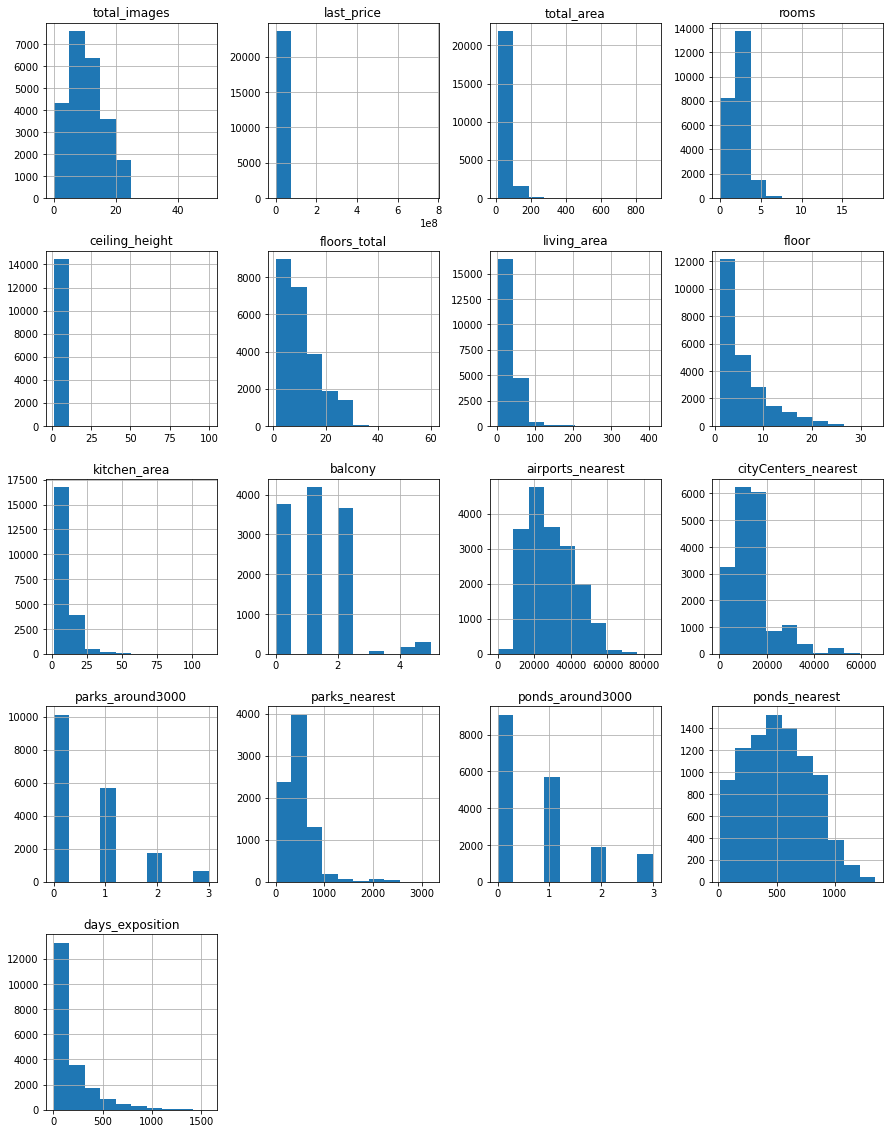

In [185]:
raw_data.hist(figsize=(15, 20))

---
##### Промежуточные выводы

Датафрейм содержит значительное количество пропусков, которые будем исправлять на следующем этапе. Описание полей имеется, так что структура данных ясна.

### Предобработка данных

#### Заполнение пропусков

##### **Выявление**

In [186]:
# посчитаем количество, процент пропусков и медианные значения по каждому столбцу
print('Количество строк в выборке:', len(raw_data))
display(
 pd.concat([
     raw_data.isna().sum(), 
     raw_data.isna().mean()*100,
     raw_data.median(numeric_only=True)
 ],axis=1).rename(columns=({0:'empties', 1:'empties%', 2:'median'}))
)

# также создадим копию данных good_data для последующей очистки
good_data = raw_data.copy()

Количество строк в выборке: 23699


,empties,empties%,median
total_images,0,0.00,9.00
last_price,0,0.00,4650000.00
total_area,0,0.00,52.00
first_day_exposition,0,0.00,NaN
rooms,0,0.00,2.00
ceiling_height,9195,38.80,2.65
floors_total,86,0.36,9.00
living_area,1903,8.03,30.00
floor,0,0.00,4.00
is_apartment,20924,88.29,NaN


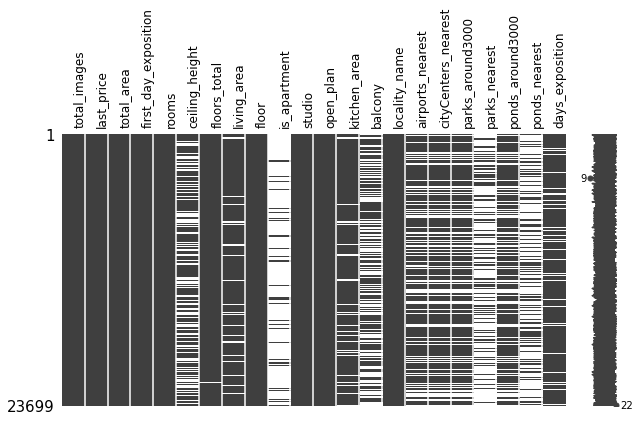

In [187]:
# тест библиотеки по рекомендации ревьюера

missingno.matrix(raw_data,figsize=(10,5), fontsize=12, label_rotation=90);

##### **Заполнение**

Пройдем по каждому полю с пропусками. Предварительно подготовим функцию отображения информации о пропусках для запрашиваемой колонки.

In [188]:
# функция для стандартного отображения деталей по колонке
def column_na_details(dataset, column_name):
    missed = dataset[column_name].isna().sum()
    total = len(dataset[column_name])
    try:
        median =  dataset[column_name].median()
    except:
        median = 'n/a'
    try:
        percent = round(missed / total*100,1)
    except:
        percent = 'n/a'
    print(f'\tВ "{column_name}" пропущено {missed} из {total} строк [{percent}%]. Медиана имеющихся значений {median}')

***
***ceiling_height***

In [189]:
column_na_details(good_data,'ceiling_height')

	В "ceiling_height" пропущено 9195 из 23699 строк [38.8%]. Медиана имеющихся значений 2.65


Вероятно, пользователи не посчитали нужным указывать данный параметр. <mark style="background:lightgreen">Заполним</mark> пропуски медианным значением.

In [190]:
good_data['ceiling_height'].fillna(good_data['ceiling_height'].median(), inplace = True)

***
***floors_total***

In [191]:
column_na_details(good_data,'floors_total')

	В "floors_total" пропущено 86 из 23699 строк [0.4%]. Медиана имеющихся значений 9.0


Проверим, на каких обычно этажах прожают квартиры отсносительно общей этажности дома.

In [192]:
print('Средний этаж продаваемых квартир:', good_data['floor'].median())
print('Средняя этажность дома:', good_data['floors_total'].median())

Средний этаж продаваемых квартир: 4.0
Средняя этажность дома: 9.0


Обычно продаются квартиры на средних этажах, потому <mark style="background:lightgreen">заполним</mark> пропуски расчетным значением как этаж продаваемой квартиры * 2 + 1

In [193]:
good_data['floors_total'].fillna(good_data['floor']*2+1, inplace = True)
# good_data.dropna(axis=0, subset='floors_total', inplace=True)

***
***is_apartment***

In [194]:
column_na_details(good_data,'is_apartment') 
display(good_data['is_apartment'].value_counts())

	В "is_apartment" пропущено 20924 из 23699 строк [88.3%]. Медиана имеющихся значений 0.0


False    2725
True       50
Name: is_apartment, dtype: int64

Среди имеющихся данных подавляющее большинство объектов не являются апартаментами. Апартаменты - редкое явление, и пользователи не сичитают нужным заполнять это поле. Так что <mark style="background:lightgreen">заполним</mark> пропуски как `False`.

In [195]:
good_data['is_apartment'].fillna(False, inplace = True)

***
***living_area*** 

In [196]:
column_na_details(good_data,'living_area')

	В "living_area" пропущено 1903 из 23699 строк [8.0%]. Медиана имеющихся значений 30.0


Проверим гипотезу появления пропусков - это может быть связано с планировкой квартиры (студия либо свободная планировка), когда пользователь затрудняется указать именно жилую площадь.

In [197]:
print('Квартир-студий в выборке:',len(good_data.query('studio == True')))
print('Квартир cо свободной планировкой:',len(good_data.query('open_plan == True')))
print('Не заполнена жилая площадь:',len(good_data.query('living_area.isna()')))

Квартир-студий в выборке: 149
Квартир cо свободной планировкой: 67
Не заполнена жилая площадь: 1903


Гипотеза не подтвердилась, количество пропусков и количество студий/свободных планировок не сопоставимо. Видимо, причина пропусков в пользователях - они не вносят эти данные.

Проверим зависимость `living_area` от `total_area`

,living_area,total_area
living_area,1.00,0.94
total_area,0.94,1.00


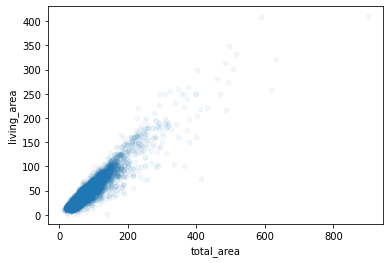

In [198]:
good_data.plot(kind='scatter', y='living_area', x='total_area', alpha = 0.05 ) # график
good_data[['living_area','total_area']].corr() # корреляция

Форма графика и коэф-т корреляции (0.94) подтверждают высокую зависимость между `living_area` и `total_area`. 
Так что можем вывести коэффициент соотношения этих параметров и рассчитать ожидаемую `living_area` для пропусков.
<mark style="background:lightgreen">Заполним</mark> пропуски расчетными значениями   

In [199]:
# соотношение жилой площади к общей в выборке
living_area_share = good_data['living_area'].sum() / good_data[good_data['living_area'].isna() == False]['total_area'].sum()
print('Средее соотношение жилой площади к общей:',round(living_area_share*100,1),'%')
good_data.loc[good_data['living_area'].isna(),'living_area']  =  good_data['total_area'] * living_area_share

# good_data.dropna(axis=0, subset='living_area', inplace=True)

Средее соотношение жилой площади к общей: 57.3 %


***
***kitchen_area*** 

In [200]:
column_na_details(good_data,'kitchen_area')

	В "kitchen_area" пропущено 2278 из 23699 строк [9.6%]. Медиана имеющихся значений 9.1


Попробуем найти причинами пропусков. Как гипотеза - это может быть связано с планировкой квартиры (студия либо свободная планировка), когда пользователь затрудняется указать именно жилую площадь. Проверим

In [201]:
print('Квартир-студий в выборке:',len(good_data.query('studio == True')))
print('Квартир cо свободной планировкой:',len(good_data.query('open_plan == True')))
print('Не заполнена площадь кухни:',len(good_data.query('kitchen_area.isna()')))

Квартир-студий в выборке: 149
Квартир cо свободной планировкой: 67
Не заполнена площадь кухни: 2278


Гипотеза не подтвердилась, количество пропусков и количество студий/свободных планировок не сопоставимо. Видимо, причнина пропусков в пользователях - они не вносят эти данные.

Проверим зависимость `kitchen_area` от `total_area`

,kitchen_area,total_area
kitchen_area,1.00,0.61
total_area,0.61,1.00


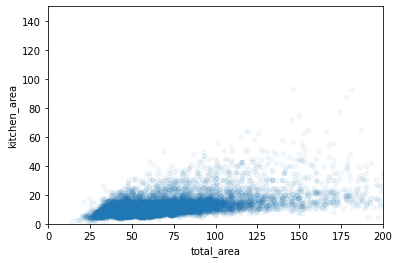

In [202]:
good_data.plot(kind='scatter', y='kitchen_area', x='total_area', alpha = 0.05, xlim = (0,200), ylim=(0,150) )
good_data[['kitchen_area','total_area']].corr()

По графику и коэф-ту кореляции (0.6) видно, что зависимость площади кухни от общей площади не столь однозначна. 
При этом видно, что кухни площадью до 20m2 самые распространненные а площадью > 40 m2 практически не встречаются. 
Для дальнейшего продолжения анализа остановимся на <mark style="background:lightgreen">заполнении</mark> пропусков медианным значением 9.1 м2 как наиболее подходящем варианте. Если при этом сумма жилой площади и площади кухни превысит полную площадь - урежем размер кухни до этой разницы

In [203]:
good_data['kitchen_area'].fillna(good_data['kitchen_area'].median(), inplace = True)
good_data.loc[(good_data['kitchen_area'] + good_data['living_area']) > good_data['total_area'], 'kitchen_area'] = good_data['total_area'] - good_data['living_area']
#good_data.dropna(axis=0, subset='kitchen_area', inplace=True)

***
***balcony***

In [204]:
column_na_details(good_data,'balcony')

	В "balcony" пропущено 11519 из 23699 строк [48.6%]. Медиана имеющихся значений 1.0


Считаем, что если данные не указаны пользователем - значит балкона нет. <mark style="background:lightgreen">Заменим</mark> пропуски на `0`.

In [205]:
good_data['balcony'].fillna(0, inplace = True)

***
***days_exposition***

In [206]:
column_na_details(good_data,'days_exposition')

	В "days_exposition" пропущено 3181 из 23699 строк [13.4%]. Медиана имеющихся значений 95.0


***исправлено согласно комментария ревьюера***

Пропуск в этом поле может означать, что объект еще не продали, либо продали, но не поставили отметку о продаже. Дни в продаже - индивидуальный и персональный параметр для каждого объявления, потому <mark style="background:gold">оставим</mark> пропуски без корректировок.

In [207]:
#good_data['days_exposition'].fillna(good_data['days_exposition'].median(), inplace = True)
#good_data.dropna(axis=0, subset='days_exposition', inplace=True)

***
***locality_name***

In [208]:
column_na_details(good_data,'locality_name')

	В "locality_name" пропущено 49 из 23699 строк [0.2%]. Медиана имеющихся значений n/a


В незначительных количествах случаев не указано название населенного пункта, потому <mark style="background:tomato">отбросим</mark> эти строки. Как причину можно выделить ошибку пользователя при внесении данных либо определенные населенные пункты отсутствуют в вариантах выбора при регистрации объявления. Каких именно - ответить по имеющимся данным нельзя.

In [209]:
good_data.dropna(axis=0, subset='locality_name', inplace=True)

***
***Картографические данные***
`airports_nearest` `cityCenters_nearest` `parks_around3000` `ponds_around3000` `parks_nearest` `ponds_nearest`

In [210]:
column_na_details(good_data,'airports_nearest')
column_na_details(good_data,'cityCenters_nearest')
column_na_details(good_data,'parks_around3000')
column_na_details(good_data,'parks_nearest')
column_na_details(good_data,'ponds_around3000')
column_na_details(good_data,'ponds_nearest')

	В "airports_nearest" пропущено 5534 из 23650 строк [23.4%]. Медиана имеющихся значений 26756.5
	В "cityCenters_nearest" пропущено 5511 из 23650 строк [23.3%]. Медиана имеющихся значений 13105.0
	В "parks_around3000" пропущено 5510 из 23650 строк [23.3%]. Медиана имеющихся значений 0.0
	В "parks_nearest" пропущено 15586 из 23650 строк [65.9%]. Медиана имеющихся значений 454.5
	В "ponds_around3000" пропущено 5510 из 23650 строк [23.3%]. Медиана имеющихся значений 1.0
	В "ponds_nearest" пропущено 14565 из 23650 строк [61.6%]. Медиана имеющихся значений 502.0


Видно, что эти столбцы содержат большое количество пропусков, начиная от 5.5 тысяч. Проверим, проявляются ли они на одних и тех же строках.

In [211]:
#good_data.pivot_table(index = 'locality_name', values='airports_nearest', aggfunc=['median','min','max'])

# посчитаем количество строк с одновременными пропусками в шести столбцах геоданных
bad_geo = good_data.query('airports_nearest.isna() \
                        and cityCenters_nearest.isna() \
                        and parks_around3000.isna() \
                        and ponds_around3000.isna() \
                        and parks_nearest.isna() \
                        and ponds_nearest.isna()')
print('Строк с отсутствующими геоданными:', len(bad_geo))

Строк с отсутствующими геоданными: 5510


Как видим, все пропуски по 6 колонкам геоданных аллоцируются на одни и те же строки.
Это может говорить о том, что источник пропусков как минимум по 4м колонкам `airports_nearest` `cityCenters_nearest` `parks_around3000` `ponds_around3000` и тот же, т.к. количество пропусков по ним практически идентично. Возможно, эти колонки заполняются автоматически при регистрации объявления, например на основании введенного адреса или геолокации.

Проверим, как именно распределяются квартиры с полным отсутствием картографических данных по населенным пунктам. Найдем Топ-10 населенных пунктов:

In [212]:
print('\nТоп-10 населенных пунктов по количеству объявлений с проблемами в геоданных(locality_name_bad) к общему количеству объявлений в этих пунктах (locality_name_all):\n')
display(
    pd.DataFrame(bad_geo['locality_name'].value_counts()).join(good_data['locality_name'].value_counts() , how='left', lsuffix='_bad', rsuffix='_all').head(10)
)


Топ-10 населенных пунктов по количеству объявлений с проблемами в геоданных(locality_name_bad) к общему количеству объявлений в этих пунктах (locality_name_all):



,locality_name_bad,locality_name_all
посёлок Мурино,522,522
Всеволожск,398,398
Гатчина,307,307
деревня Кудрово,299,299
Выборг,237,237
Кудрово,173,173
деревня Новое Девяткино,144,144
Сертолово,142,142
Кириши,125,125
Сланцы,112,112


Видно, что есть населенные пункты с большим количеством объявлений, но , при этом, с полностью отсутстувующими картографическими данными. Вероятность такого совпадения либо сговора пользователей маловероятна. Так что скорее всего это проблема самой системы. Пропуски могут быть вызваны некорретной работой сайта регистрации (неверно определяет геолокацию), либо невозможно выбрать корректный адрес из выпадающих списков (если таковые есть в самой форме регистрации объявления). <mark style="background:lightblue">Эту информацию необходимо передать разработчикам.</mark>  

Придется <mark style="background:gold">оставить</mark> пропуски по столбцам `airports_nearest` `cityCenters_nearest` `parks_around3000` `ponds_around3000`, т.к. в них фигурируют достаточно много населенных пунктов с большим количеством объявлений, это важно с позиции анализа параметра квартир. Но мы сделаем дополнительный столбец с пометкой о плохом качестве картографических данных, в некоторых выборках он может понадобиться.

In [213]:
##### вариант очистки плохих геоданных 
# good_data.dropna(axis=0, subset=['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'], inplace=True)

# вариант пометки плохих геоданных
good_data['is_bad_geodata'] = (
    good_data['airports_nearest'].isna() 
    | good_data['cityCenters_nearest'].isna() 
    | good_data['parks_around3000'].isna() 
    | good_data['ponds_around3000'].isna() 
)

# отобразим таблицу для проверки корректности
good_data.head(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_bad_geodata
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,False,False,False,25.00,0.00,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,False
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,2.65,11.00,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,False
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,2.65,5.00,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,False
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,2.65,14.00,91.18,9,False,False,False,9.10,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00,False
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,False,False,False,41.00,0.00,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,False
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,2.65,12.00,14.40,5,False,False,False,9.10,0.00,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,True


***
***parks_nearest*** и ***ponds_nearest***

Посмотрим еще раз на оставшиеся после предыдущего шага пропуски в колонках `parks_nearest` `ponds_nearest`, которые не помечены, как `is_bad_geodata` в привязке к данным `parks_around3000` `ponds_around3000`

In [214]:
# распределение пропусков по значениям parks_around3000 и ponds_around3000
print('Количество пропусков')
display(
    good_data.loc[(good_data['parks_nearest'].isna()) & (good_data['is_bad_geodata'] == False)]
        .fillna('no value')
        .pivot_table(index='parks_around3000', values='parks_nearest', aggfunc='count')
)
display(
    good_data.loc[(good_data['ponds_nearest'].isna()) & (good_data['is_bad_geodata'] == False)]
        .fillna('no value')
        .pivot_table(index='ponds_around3000', values='ponds_nearest', aggfunc='count')
)

Количество пропусков


,parks_nearest
parks_around3000,
0.00,10072


,ponds_nearest
ponds_around3000,
0.00,9038


Получается, что когда количество прудов или парков в радиусе 3000 метров равно 0, колонки с расстоянием также остаются пустыми. При этом не встречается случаев, когда в радиусе 3000 метров укзан парк/пруд, а расстояние до него отсутствует.

Это может означать, что либо данные колонки заполняются автоматически и система оставляет записи пустыми при большой удаленности объектов, либо данные вносит сам пользователь. Посмотрим, как в принципе заполняются колонки `parks_nearest` `ponds_nearest` в зависимости от количества объектов поблизости

In [215]:
display(good_data.loc[good_data['is_bad_geodata'] == False].pivot_table(index = 'parks_around3000', values='parks_nearest', aggfunc=['count','min','max']))
display(good_data.loc[good_data['is_bad_geodata'] == False].pivot_table(index = 'ponds_around3000', values='ponds_nearest', aggfunc=['count','min','max']))

,count,min,max
,parks_nearest,parks_nearest,parks_nearest
parks_around3000,,,
0.00,4,3013.00,3190.00
1.00,5661,1.00,2984.00
2.00,1733,9.00,2747.00
3.00,645,4.00,700.00


,count,min,max
,ponds_nearest,ponds_nearest,ponds_nearest
ponds_around3000,,,
0.00,0,NaN,NaN
1.00,5701,20.00,1344.00
2.00,1888,13.00,1096.00
3.00,1488,22.00,950.00


Видно, что все бьется. При наличии объектов поблизости, расстояние так же указывается в адекватных интервалах.  Причем, учитывая количество объявлений, сам факт попадания в заданные рамки без вылетов означает работу автоматической системы. Пользователи, скорее всего, на данные о расстояниях не могут повлиять. Значит в системе установлен радиус поиска парков и прудов на расстоянии ~ 3200 метров (на основании максимально найденного парка. Это может быть связано с какими-то техническими ограничениями. Само по себе наличие пропусков в полях `parks_nearest` `ponds_nearest` эквиваленто отсутствию объекта в радиусе 3 км, <mark style="background:gold">оставим</mark> пропуски в выборке good_data.

***
##### **Проверка**

,empties,empties%,median
total_images,0,0.00,9.00
last_price,0,0.00,4650000.00
total_area,0,0.00,52.00
first_day_exposition,0,0.00,NaN
rooms,0,0.00,2.00
ceiling_height,0,0.00,2.65
floors_total,0,0.00,9.00
living_area,0,0.00,30.00
floor,0,0.00,4.00
is_apartment,0,0.00,0.00


Количество строк в изначальной выборке: 23699
Количество строк в финальной выборке: 23650
Удалено строк: 49 0.2 %


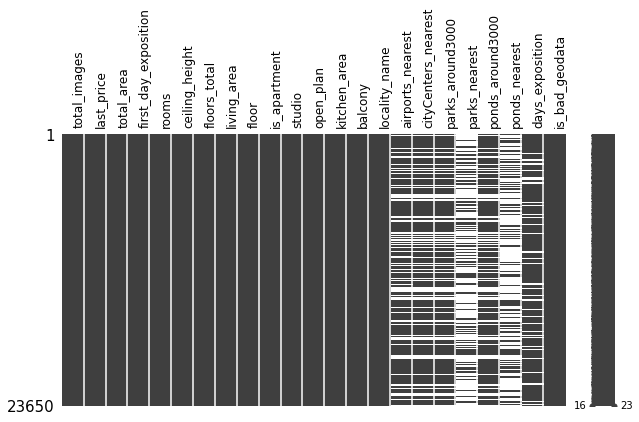

In [216]:
# выведем состатистику пропусков по столбцам
display(
 pd.concat([
     good_data.isna().sum(), 
     good_data.isna().mean()*100,
     good_data.median(numeric_only=True)
 ],axis=1).rename(columns=({0:'empties', 1:'empties%', 2:'median'}))
)

missingno.matrix(good_data,figsize=(10,5), fontsize=12, label_rotation=90);

# сравним с изначальными данными
print('Количество строк в изначальной выборке:', len(raw_data))
print('Количество строк в финальной выборке:', len(good_data))
print('Удалено строк:', len(raw_data) - len(good_data),  round(100 -len(good_data) / len(raw_data) * 100,1), '%')


##### **Промежуточные выводы**
Все возможные пропуски заполнены. В рамках заполнения пришлось удалить небольшое количество строк из-за присутствующих в них пропусков. Остальные пропуска удалось заменить на подходящие в том или ином случае значения. Исключение - столбцы с геоданными. Очень по многим строкам этой информации нет в принципе, так что пришлось отмаркировать эти строки в столбце is_bad_geoda и оставить в выборке.

Добавлены столбцы:
- `is_bad_geodata` с маркировкой пропусков картографических данных

Удалось сформировать список потенциальных причин пропуска данных:
- пользователи могут не указывать всевозможную информацию - этажность дома, количество балконов.
- проблемы при сборе геоинформации для определенных городов, например для `посёлок Мурино` или `Всеволожск`. Возможно, для этих городов не может быть определена геолокация пользователя или невозможно выбрать адрес помещения на сайте. Данную проблему необходимо передать разработчикам для дальнейших прояснений.
- для полей с расстоянием до ближайшего парка и пруда не фиксируется расстояние, если расстояние до ближайшего более 3200 метров.


#### Преобразование типов данных

In [217]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В некоторых столбцах можем изменить тип данных:

    #   Column                Текущий тип   Новый тип   Причина
---  ------                --------------   -----       ----- 
     1   last_price            float64      int         В таком деле как недвижимость - лучше отбросить копейки, чтобы не отображать излишнюю дробную часть
     3   first_day_exposition  object       datetime    Здесь должен быть формат даты в формате Pandas
     6   floors_total          float64      int         Количество этажей - величина целочисленная
     9   is_apartment          object       bool        Объект либо является апаратаментом либо нет. Это булево значение.
     13  balcony               float64      int         Количество балконов - величина целочисленная.
     17  parks_around3000      float64      int         Количество парков - величина целочисленная.
     19  ponds_around3000      float64      int         Количество прудов - величина целочисленная.
     21  days_exposition       float64      int         Дни можно оставить и как float, если нас интересуют доли суток. Однако в этом кейсе более применимы целочисленные дни.

In [218]:
# преобразуем типы данных
 
good_data['total_images'] = good_data['total_images'].astype('int32')
good_data['last_price'] = good_data['last_price'].astype('int32')
good_data['total_area'] = good_data['total_area'].astype('float32')
good_data['first_day_exposition'] = pd.to_datetime(good_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
good_data['rooms'] = good_data['rooms'].astype('int32')
good_data['ceiling_height'] = good_data['ceiling_height'].astype('float32')
good_data['living_area'] = good_data['living_area'].astype('float32')
good_data['kitchen_area'] = good_data['kitchen_area'].astype('float32')
good_data['floor'] = good_data['floor'].astype('int32')
good_data['floors_total'] = good_data['floors_total'].astype('int32')
good_data['is_apartment'] = good_data['is_apartment'].astype('bool')
good_data['balcony'] = good_data['balcony'].astype('int32')
good_data['parks_around3000'] = good_data['parks_around3000'].astype('int', errors='ignore')
good_data['ponds_around3000'] = good_data['ponds_around3000'].astype('int', errors='ignore')
#good_data['days_exposition'].describe()
good_data['days_exposition'] = good_data['days_exposition'].astype('int', errors='ignore')

# проверим результаты преобразований
display(good_data.info())                     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int32         
 1   last_price            23650 non-null  int32         
 2   total_area            23650 non-null  float32       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int32         
 5   ceiling_height        23650 non-null  float32       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float32       
 8   floor                 23650 non-null  int32         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float32       
 13  balcony         

None

---
##### Промежуточные выводы

Не все колонки удалось заменить на int, `parks_around3000` и `ponds_around3000` содержат пустые значения NaN, так что формат полей остался float

#### Удаление дубликатов

---
##### **Удаление явных дубликатов**

In [219]:
good_data.duplicated().sum()

0

Явных дубликатов нет, перейдем к поиску неявных. 

---
##### **Удаление неявных дубликатов**

Потенциальный источник неявных дубликатов - столбец с наименованием населенного пункта. Проверим дубликаты по размеру символов

In [220]:
#import random
# функция для приведения текста к единому формату размера символов
def text_to_title(text):
    text=str(text)
    return  text.title() # тест суффикс на проверку корректности работы + str(random.randrange(100))

print('Уникальных названий до стандартизации формата:', len(good_data['locality_name'].unique()))
print('Уникальных названий после стандартизации формата:',len(good_data['locality_name'].apply(lambda x: text_to_title(x)).unique()))

Уникальных названий до стандартизации формата: 364
Уникальных названий после стандартизации формата: 364


Дубликатов по размеру символов нет. Проверим дубликаты по типам поселений.  Для отражения корректировок создадим новый столбец в good_data.

In [221]:
# новый столбец с откорректированными названиями
good_data['locality_name_corrected'] = good_data['locality_name']

In [222]:
# заведем пару функций 
# функция для получения последнего слова из текстовой строки
def get_last_word(text):
    text=str(text)
    last_space_index = text.rfind(' ') 
    if last_space_index== -1:
        return text
    else:
        return  text[last_space_index+1:]
    
# print(get_last_word('0123 456')) # тестовая строка

In [223]:
# функция выведет таблицу с дубликатами последнего слова в указанном series 
def get_last_word_duplicates(pd_series, row_amount):
    # выгружаем полный список всех локаций
    _result = pd.DataFrame( pd_series.value_counts()).reset_index()
    _result.columns = ['original_text', 'value_counts']

    # вытаскиваем последнее слово из текстовой строки
    _result['last_word'] = _result.apply(lambda x: get_last_word(x['original_text']),axis=1)  

    # вычисляем дубликаты по last_word
    last_words_duplicated = list(_result[_result['last_word'].duplicated()]['last_word'])
 
    # добавим маркер потенциальных дубликатов
    _result['last_word_duplicate'] = _result['last_word'].isin(last_words_duplicated)

    display(_result[_result['last_word_duplicate']].sort_values(by='last_word').head(row_amount))
    print('Всего дубликатов последних слов:', len(_result[_result['last_word_duplicate']]))

In [224]:
# итерация 1
get_last_word_duplicates(good_data['locality_name_corrected'], 5)

,original_text,value_counts,last_word,last_word_duplicate
151,поселок Аннино,5,Аннино,True
90,посёлок Аннино,11,Аннино,True
63,деревня Бегуницы,17,Бегуницы,True
240,деревня Старые Бегуницы,2,Бегуницы,True
141,поселок городского типа Красный Бор,5,Бор,True


Всего дубликатов последних слов: 130


Видно, что часть дубликатов связано с различным написанием `поселок` или `посёлок`.

In [225]:

good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('поселок','посёлок')

# итерация 2
get_last_word_duplicates(good_data['locality_name_corrected'], 20)

,original_text,value_counts,last_word,last_word_duplicate
65,деревня Бегуницы,17,Бегуницы,True
234,деревня Старые Бегуницы,2,Бегуницы,True
26,Сосновый Бор,87,Бор,True
296,деревня Чудской Бор,1,Бор,True
203,деревня Бор,2,Бор,True
225,посёлок Пансионат Зелёный Бор,2,Бор,True
107,посёлок городского типа Красный Бор,8,Бор,True
259,деревня Трубников Бор,1,Бор,True
157,посёлок станции Вещево,4,Вещево,True
297,посёлок при железнодорожной станции Вещево,1,Вещево,True


Всего дубликатов последних слов: 67


Часть дубликатов появляется из-за разного наименования пар значений:
- посёлок станции / посёлок при железнодорожной станции
- городской посёлок / посёлок городского типа
- посёлок / деревня

Фактически, разные типы поселений реально могут означать разные населенные пункты, хоть и с одним названием. Удалим все упоминания о типе поселений из столбца `locality_name_corrected`, тем более, что мы сохранили оригинальные данные в `locality_name`

In [226]:
replaced_values=[
    'деревня ','посёлок при железнодорожной станции ',
    'городской посёлок ','посёлок городского типа ','коттеджный посёлок ','посёлок станции ','посёлок ','садовое товарищество ',
    'садоводческое некоммерческое товарищество ','село '
]

for item in replaced_values:
    good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace(item,'')

#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('деревня ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('посёлок при железнодорожной станции ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('городской посёлок ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('посёлок городского типа ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('коттеджный посёлок ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('посёлок станции ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('посёлок ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('садовое товарищество ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('садоводческое некоммерческое товарищество ','')
#good_data['locality_name_corrected'] = good_data['locality_name_corrected'].str.replace('село ','')

# итерация 3
get_last_word_duplicates(good_data['locality_name_corrected'], 20)

,original_text,value_counts,last_word,last_word_duplicate
64,Бегуницы,17,Бегуницы,True
214,Старые Бегуницы,2,Бегуницы,True
25,Сосновый Бор,87,Бор,True
274,Чудской Бор,1,Бор,True
251,Трубников Бор,1,Бор,True
223,Пансионат Зелёный Бор,2,Бор,True
211,Бор,2,Бор,True
107,Красный Бор,8,Бор,True
140,Дружная Горка,5,Горка,True
294,Форт Красная Горка,1,Горка,True


Всего дубликатов последних слов: 18


Другое дело - остались только похожие названия разных поселений.

---
##### **Проверка**
Проверим еще раз список уникальных значений в столбцах `locality_name_corrected` и `locality_name_corrected`

In [227]:
print('Уникальных поселений до:', len(good_data['locality_name'].unique()))
print('Уникальных поселений после:', len(good_data['locality_name_corrected'].unique())) 
print('Удалено дубликатов названий поселений:', len(good_data['locality_name'].unique()) - len(good_data['locality_name_corrected'].unique()))
print('Общее количество явных дубликатов после всех манипуляций:', good_data.duplicated().sum())

Уникальных поселений до: 364
Уникальных поселений после: 305
Удалено дубликатов названий поселений: 59
Общее количество явных дубликатов после всех манипуляций: 0


---
##### Промежуточные выводы

Явных дубликатов в датасете не обнаружилось, однако было небольшое количество неявных дубликатов в названиях населенных пунктов. В общей сложности было исправлено 59 дубликатов названий и количество уникальных населенных пунктов снизилось с 364 до 305. Для откорректированных названий был добавлен столбец `locality_name_corrected`, чтобы не терять оригинальное название в столбце `locality_name`

---

#### Устранение редких и выбивающихся значений

In [228]:
# отобразим раскладку по всем столбцам

display(good_data.describe().T)

,count,mean,std,min,25%,50%,75%,max
total_images,23650.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23650.00,6541126.90,10896399.18,12190.00,3400000.00,4650000.00,6799000.00,763000000.00
total_area,23650.00,60.33,35.66,12.00,40.00,52.00,69.70,900.00
rooms,23650.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,23650.00,2.72,0.99,1.00,2.60,2.65,2.70,100.00
floors_total,23650.00,10.71,6.65,1.00,5.00,9.00,16.00,60.00
living_area,23650.00,34.59,22.37,2.00,19.00,30.00,42.10,409.70
floor,23650.00,5.89,4.88,1.00,2.00,4.00,8.00,33.00
kitchen_area,23650.00,10.38,5.63,0.00,7.20,9.10,11.40,112.00
balcony,23650.00,0.59,0.96,0.00,0.00,0.00,1.00,5.00


Подозрительно выглядят крайние значения в столбцах:
- last_price - квартира ценой от 12 тысяч ?
- rooms - есть варианты с 0 комнат ?
- ceiling_height - потолки от 1 до 100 метров ?
- floors_total - жилая 60ти этажка ?
- total_area - 900м2 квартира может быть, но это явно вылет в рамках текущего исследования
- living_area - жилая площадь от 2х метров ?
- kitchen_area - кухня от 1.3 метра?
- airports_nearest - расстояние от 0 метров ?

---
***last price***

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_bad_geodata,locality_name_corrected
8793,7,12190,109.00,2019-03-20,2,2.75,25,32.00,25,False,False,False,40.50,0,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00,False,Санкт-Петербург
17456,7,430000,30.40,2019-04-22,1,2.65,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Сланцы
14911,5,430000,54.00,2018-06-26,2,2.65,3,30.97,3,False,False,False,9.10,0,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.00,True,Свирь
16274,18,440000,40.00,2018-07-10,1,2.65,5,22.94,1,False,False,False,9.10,0,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.00,True,Старополье
17676,0,450000,36.50,2018-02-01,1,2.65,5,17.30,4,False,False,False,8.50,1,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.00,True,Ям-Тесово


<AxesSubplot:>

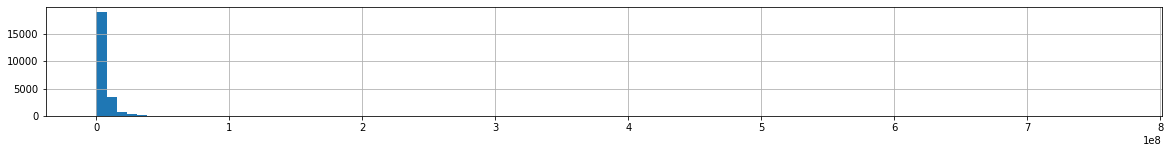

In [229]:
display(good_data.sort_values(by='last_price').head(5))
good_data['last_price'].hist(bins=100, figsize=(20,2) )

Самая дешевая квартира явно занижена в 1000 раз, откорректируем. Также есть ряд чрезвычайно дорогих квартир, явно явлюящимися вылетами в рамках данного исследования. Также уберем из исследования все варианты дороже 40 миллионов

In [230]:
good_data.loc[8793,'last_price']=good_data.loc[8793,'last_price'] * 1000
good_data = good_data[good_data['last_price']<=40000000]

---
***rooms***

Есть квартиры с 0 комнат. Даже если это студия, и комната объединена с кухней, все равно посчитаем, что меньше 1 комнаты в квартире быть не может. Перезапишем все нулевые комнаты на 1

In [231]:
good_data.loc[good_data['rooms']==0,'rooms'] =  1

---
***ceiling_height***

In [232]:
# округлим высолты с шагом 20 см
def round_20sm(value):
    return value//0.2 * 0.2

display(
    pd.DataFrame(
        good_data['ceiling_height'].apply(round_20sm).value_counts()
    ).sort_index().T
) 

,0.80,1.20,1.60,1.80,2.20,2.40,2.60,2.80,3.00,3.20,3.40,3.60,3.80,4.00,4.20,4.40,4.60,4.80,5.20,5.40,5.80,7.80,8.20,10.20,13.80,19.80,22.60,23.80,24.80,25.80,26.80,27.40,31.80,99.80
ceiling_height,1,1,1,11,7,6773,13718,1514,424,514,306,76,59,17,3,8,1,2,1,1,1,3,1,1,1,1,1,1,7,1,8,1,2,1


Вылеты видны. Слишком низкие (меньше 2.5 метра по нормативу для жилых помещений не строят, так что приведем к 2.5 метрам), Все, что выше 5 метров - удалим, т.к. это явно ошибка, но варианты исправления не очевидны

In [233]:
good_data.loc[good_data['ceiling_height']<2.5, 'ceiling_height'] =  2.5
good_data = good_data[good_data['ceiling_height']<5]

---
***floors_total***

ЖК "Князь Александр Невский" Самое высокое жилое здание в Питере , 37 этажей. Отбросим все, что выше 37 этажей.

In [234]:
good_data = good_data[good_data['floors_total']<=37]
good_data = good_data[good_data['floor']<=37]

---
***total_area***

<AxesSubplot:title={'center':'Распределение total_area'}, ylabel='Frequency'>

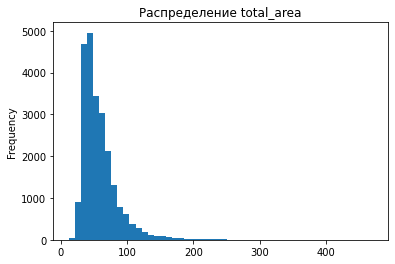

In [235]:
good_data['total_area'].plot(kind='hist', bins=50, title ='Распределение total_area')

Удалим все, что больше 250 м2, т.к. явно выбиваются за основную массу

In [236]:
good_data = good_data[good_data['total_area']<=250]

---
***living_area***

<AxesSubplot:title={'center':'Распределение living_area'}, ylabel='Frequency'>

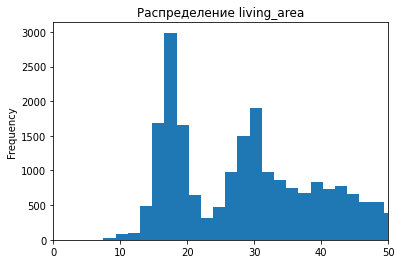

In [237]:
good_data['living_area'].plot(kind='hist', bins=100, xlim=(0,50), title ='Распределение living_area')

Отбросим все, что меньше 10 метров

In [238]:
good_data = good_data[good_data['living_area']>=10]

---
***kitchen_area***

Кухонь площадью более 50м2: 19


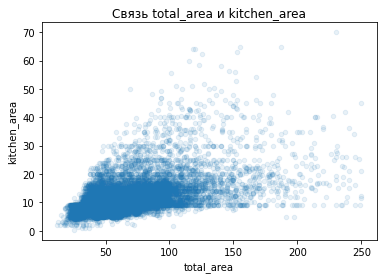

In [239]:
good_data[good_data['kitchen_area']>0].plot(kind='scatter', y='kitchen_area', x='total_area', alpha = .1 , title ='Связь total_area и kitchen_area')
print('Кухонь площадью более 50м2:', len(good_data[good_data['kitchen_area']>50]) )

Удалим квартиры, в которых кухня более 50 метров, т.к. выглядит неправдоподобно

In [240]:
good_data = good_data[~(good_data['kitchen_area']>50)]

---
***airports_nearest***

Удалим непустые строки, где расстояние до аэропорта равно 0

In [241]:
good_data = good_data[(good_data['airports_nearest']>0) | good_data['airports_nearest'].isna()]

---
***Проверим данные финальной выборки***

In [242]:
# сравним с изначальными данными
print('Количество строк в изначальной выборке:', len(raw_data))
print('Количество строк в финальной выборке:', len(good_data))
print('Удалено строк:', len(raw_data) - len(good_data),  round(100 -len(good_data) / len(raw_data) * 100,1), '%')

Количество строк в изначальной выборке: 23699
Количество строк в финальной выборке: 23322
Удалено строк: 377 1.6 %


---
##### Промежуточные выводы

В выборке присутствовало определенно количество данных, которые можно признать выбросами. Проверке и корректировке подверглись столбцы
- last_price
- rooms 
- ceiling_height 
- floors_total
- total_area
- living_area 
- kitchen_area 
- airports_nearest 

из-за выбросов в которых в общей сложности было удалено чуть больше 300 строк.

---

### Посчитайте и добавьте в таблицу новые столбцы

Добавим новые столбцы:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [243]:
def floor_to_floortype(floor, floors_total):
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'

good_data['price_per_m2'] = good_data['last_price'] / good_data['total_area']
good_data['exposition_weekday'] = good_data['first_day_exposition'].dt.weekday
good_data['exposition_month'] = good_data['first_day_exposition'].dt.month
good_data['exposition_year'] = good_data['first_day_exposition'].dt.year
good_data['floor_type'] = good_data.apply(lambda x: floor_to_floortype(x['floor'], x['floors_total']) ,axis=1 )
good_data['cityCenters_nearest_km'] = round(good_data['cityCenters_nearest'] / 1000)

# столбец для корректной отрисовки pieChart
good_data['counter'] = 1

good_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_bad_geodata,locality_name_corrected,price_per_m2,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km,counter
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN,False,Санкт-Петербург,120370.37,3,3,2019,другой,16.00,1
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00,False,Шушары,82920.79,1,12,2018,первый,19.00,1
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00,False,Санкт-Петербург,92785.71,3,8,2015,другой,14.00,1
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00,False,Санкт-Петербург,100000.00,1,6,2018,другой,8.00,1
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00,True,Янино-1,95065.79,0,9,2018,другой,NaN,1


### Проведите исследовательский анализ данных

#### Изучение параметров объектов

In [244]:
# функция для отображения данных по колонке
def check_column_data(dataframe, column_name, bins=10):
    try:
        display(dataframe[column_name].plot(kind='hist', x=column_name, figsize=(6,2), bins=bins, title=column_name))
    except:
        pass
    display(pd.DataFrame(dataframe[column_name].describe()).T)

---
**Общая площадь**

<AxesSubplot:title={'center':'total_area'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
total_area,23322.00,58.36,27.57,12.00,40.00,51.80,68.70,250.00


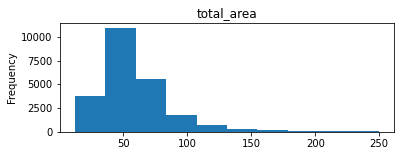

In [245]:
check_column_data(good_data, 'total_area')

Основное предложение приходится на квартиры площадью от 40 до 69 м2, медианное значение - 52м2. 
При этом в выборке присутствуют как очень маленькие (от 12м2) так и очень большие (до 250м2) варианты.

---
**Жилая площадь**

<AxesSubplot:title={'center':'living_area'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
living_area,23322.00,33.51,18.12,10.00,19.00,30.00,42.00,184.00


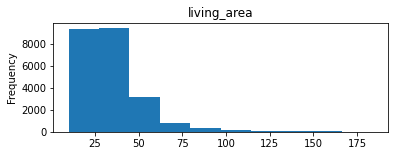

In [246]:
check_column_data(good_data, 'living_area')

Площадь жилих зон в основном от 19 до 42 м2, медианное значение - 30м2. 

---
**Площадь кухни**

<AxesSubplot:title={'center':'kitchen_area'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
kitchen_area,23322.00,10.15,4.77,0.00,7.20,9.10,11.30,50.00


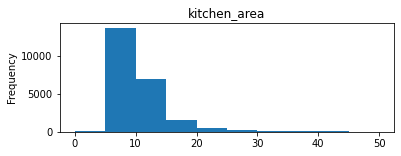

In [247]:
check_column_data(good_data, 'kitchen_area')

Площадь кухонь в основном от 7 до 11м2, но есть и выдающиеся варианты в 50м2

---
**Цена объекта**

<AxesSubplot:title={'center':'last_price'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
last_price,23322.00,5853496.92,4466101.95,430000.00,3400000.00,4600000.00,6693750.00,40000000.00


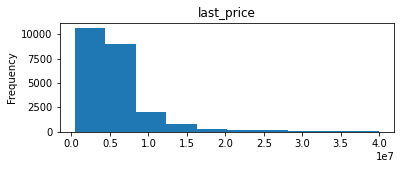

In [248]:
check_column_data(good_data, 'last_price')

Цена варьируется в широких пределах, от 430т.р. до 40 миллионов, при этом самые продаваемые квартиры - в диапазоне от 3,4 до 6,7 миллиона

---
**Количество комнат**

<AxesSubplot:title={'center':'rooms'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
rooms,23322.00,2.05,1.01,1.00,1.00,2.00,3.00,14.00


,1,2,3,4,5,6,7,8,9,11,10,14
rooms,8190,7882,5728,1119,276,78,35,7,3,2,1,1


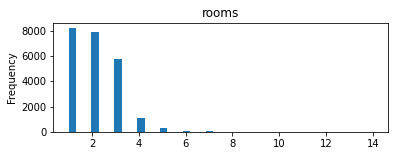

In [249]:
check_column_data(good_data, 'rooms',40)
pd.DataFrame(good_data['rooms'].value_counts()).T


На первом месте по количеству - однокомнатные квартиры (8190 предложений), немного меньше двухкомнатных (7882), далее трехкомнатные (5728). Четырех и более комнатные варианты представлены гораздо меньше

---
**Высота потолков**

<AxesSubplot:title={'center':'ceiling_height'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
ceiling_height,23322.00,2.69,0.21,2.50,2.60,2.65,2.70,4.80


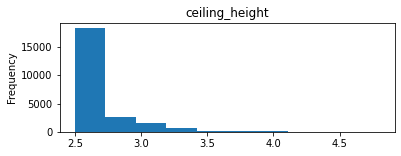

In [250]:
check_column_data(good_data, 'ceiling_height')

Основная высота потолков - 2.6 - 2.7 метра. Есть особенные варианты с потолками до 4.8 метра, но это в порядке исключения.

---
**Этаж квартиры**

<AxesSubplot:title={'center':'floor'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
floor,23322.00,5.89,4.88,1.00,2.00,4.00,8.00,33.00


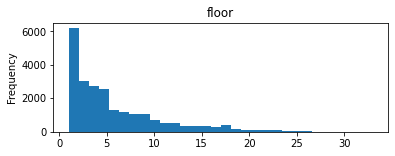

In [251]:
check_column_data(good_data, 'floor', 30)


В основном продают квартиры на 1-5х этажах, причем квартир на первом этаже предлагается значительно больше, чем на любом другом. Квартиры на этаже выше пятого также продают, но в значительно меньших количествах.

---
**Тип этажа квартиры**

<AxesSubplot:title={'center':'floor_type'}, ylabel='counter'>

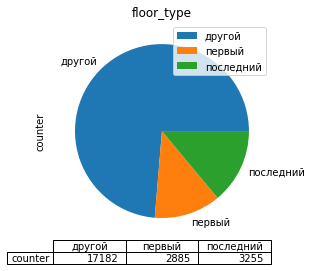

In [252]:
good_data.pivot_table(index='floor_type', aggfunc='count').plot(
    kind='pie', 
    x='floor_type', 
    y='counter', 
    table=True, 
    title='floor_type')

Почти 3/4 всех предложений на промежуточных этажах. Остальные предложения поровну делятся между первыми и последними этажами

--- 
**Количество этажей в доме**

<AxesSubplot:title={'center':'floors_total'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
floors_total,23322.00,10.73,6.61,1.00,5.00,9.00,16.00,37.00


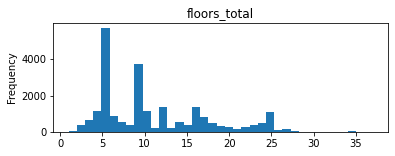

In [253]:
check_column_data(good_data, 'floors_total',37)

Квартиры предлагаются в домах разной этажности, в основном до 25 этажек. При этом явно лидируют 5-ти и 9-ти этажные дома.

---
**Расстояние до центра города в метрах**

<AxesSubplot:title={'center':'cityCenters_nearest'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
cityCenters_nearest,17830.00,14308.96,8591.20,181.00,9482.25,13168.00,16359.25,65968.00


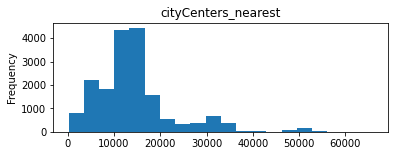


!!! Иммется информация только по 76 % объявлений


In [254]:
check_column_data(good_data, 'cityCenters_nearest',20)

plt.show()
print('\n!!! Иммется информация только по', round((1 - good_data['cityCenters_nearest'].isna().mean())*100) , '% объявлений')

На графике видна основная отдаленность от центра на 11-16 километров, также в районе 5 километров есть небольшой пик. Совсем удаленное жилье, на 20 и более километров встречается гораздо реже. 
Это данные только по 76% объявлений с имеющейся картографической информацией

---
**Расстояние до ближайшего аэропорта**

<AxesSubplot:title={'center':'airports_nearest'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
airports_nearest,17810.00,28829.60,12695.69,6450.00,18495.25,26786.00,37407.00,84869.00


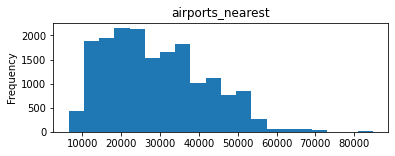


Геоданные отсутствуют в 24 % объявлений


In [255]:
check_column_data(good_data, 'airports_nearest',20)
plt.show()
print('\nГеоданные отсутствуют в', round(( good_data['is_bad_geodata'].mean())*100) , '% объявлений')

В основном квартиры расположены в 18-37 километрах от аэропорта.
Это данные только по 76% объявлений с имеющейся картографической информацией

---
**Расстояние до ближайшего парка**

<AxesSubplot:title={'center':'parks_nearest'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
parks_nearest,7855.00,492.77,343.01,1.00,288.00,456.00,613.00,3190.00


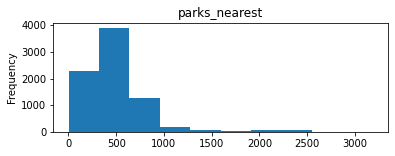


Геоданные отсутствуют в 24 % объявлений

По имеющейся информации  56 % квартир не имеют парка в радиусе 3 км


In [256]:
check_column_data(good_data, 'parks_nearest')
plt.show()
print('\nГеоданные отсутствуют в', round(( good_data['is_bad_geodata'].mean())*100) , '% объявлений')
print('\nПо имеющейся информации ', round((good_data[good_data['is_bad_geodata'] == False]['parks_nearest'].isna().mean()*100)) , '% квартир не имеют парка в радиусе 3 км')

Около 44% квартир, имеющим качественные геоданные, имеют как минимум 1 парк в радиусе 3 километров. При этом, если парк есть, то он почти всегда будет оносительно близко - в радиусе 1000 метров

---
**День и месяц публикации объявления**

<AxesSubplot:title={'center':'exposition_weekday'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
exposition_weekday,23322.00,2.57,1.79,0.00,1.00,3.00,4.00,6.00


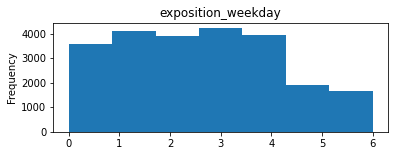

,0,1,2,3,4,5,6
exposition_weekday,3555,4123,3915,4215,3942,1901,1671


In [257]:
check_column_data(good_data, 'exposition_weekday',7 )
plt.show()
pd.DataFrame(good_data['exposition_weekday'].value_counts()).sort_index().T

В основном объявления публикуются в рабочие дни, без ярко выраженных пиков ни в один из них. Количество публикуемых ежедневно объявление в субботу и воскресенье падает примерно вдвое.

<AxesSubplot:title={'center':'exposition_month'}, ylabel='Frequency'>

,count,mean,std,min,25%,50%,75%,max
exposition_month,23322.00,6.40,3.49,1.00,3.00,6.00,10.00,12.00


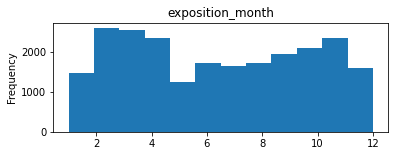

,2,3,4,11,10,9,6,8,7,12,1,5
exposition_month,2598,2549,2343,2342,2099,1951,1729,1723,1663,1607,1463,1255


In [258]:
check_column_data(good_data, 'exposition_month',12)
plt.show()
pd.DataFrame(good_data['exposition_month'].value_counts()).T

Самые "горячие" месяца - февраль и март, затишье - в январе и мае. Праздники, людям не до объявлений.

---
##### Промежуточные выводы

Удалось сформировать срез по рынку недвижимости Ленинградской области. Он выглядит следующим образом:
- Основное предложение приходится на квартиры площадью от 40 до 69 м2, медианное значение - 52м2. 
- Площадь жилих зон в основном от 19 до 42 м2, медианное значение - 30м2.
- Площадь кухонь в основном от 7 до 11м2, но есть и выдающиеся варианты в 50м2
- Цена варьируется в широких пределах, от 430т.р. до 40 миллионов, при этом самые продаваемые квартиры - в диапазоне от 3,4 до 6,7 миллиона
- На первом месте по количеству - однокомнатные квартиры (8190 предложений), немного меньше двухкомнатных (7882), далее трехкомнатные (5728). Четырех и более комнатные варианты представлены гораздо меньше
- Основная высота потолков - 2.6 - 2.7 метра
- В основном продают квартиры на 1-5х этажах, причем квартир на первом этаже предлагается значительно больше, чем на любом другом. Квартиры на этаже выше пятого также продают, но в значительно меньших количествах.
- Почти 3/4 всех предложений на промежуточных этажах. Остальные предложения поровну делятся между первыми и последними этажами
- Квартиры предлагаются в домах разной этажности, в основном до 25 этажек. При этом явно лидируют 5-ти и 9-ти этажные дома.
- Средняя отдаленность от центра на 11-16 километров. Совсем удаленное жилье, на 20 и более километров встречается гораздо реже.
- В основном квартиры расположены в 18-37 километрах от аэропорта.
- Около 44% квартир имеют как минимум 1 парк в радиусе шаговой доступности. При этом, если парк есть, то он почти всегда будет относительно близко - в радиусе 1000 метров
- Самые "горячие" месяца по размещению объявлений - февраль и март, затишье - в январе и мае. 

---
#### Задание 1: как быстро продавались квартиры

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

<AxesSubplot:ylabel='Frequency'>

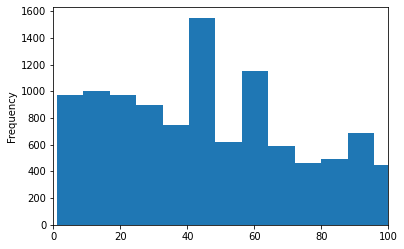

Медиана: 95.0 дней.
Среднее: 180 дней.
Необычайно быстрые продажи (быстрее 10% всех продаж) быстрее: 17.0 дней.
Необычайно долгие продажи (дольше 90% всех продаж) быстрее: 454.0 дней.


In [259]:
# график
display(good_data['days_exposition'].plot(kind='hist', bins=200, xlim=(0,100)))
plt.show()

# текст под графиком
print('Медиана:', good_data['days_exposition'].median(), 'дней.')
print('Среднее:', round(good_data['days_exposition'].mean()), 'дней.')
print('Необычайно быстрые продажи (быстрее 10% всех продаж) быстрее:', good_data['days_exposition'].quantile(0.1), 'дней.')
print('Необычайно долгие продажи (дольше 90% всех продаж) быстрее:', good_data['days_exposition'].quantile(0.9), 'дней.')

---
##### Промежуточные выводы

Обычно продажа занимает **95 дней (медиана)**, среднее при этом 168 дней, т.е. имеют место вылеты по срокам продажи

Быстрой продажей можно считать попаданием в 10-й процентиль, то есть до **17 дней** 

Необычайно долгими можно считать продажи выше 90-го процентиля, это **454 дня**

***добавлено*** также заметны выбросы в районе 45 и 60 дней. Возможно, это связано с механизмом напоминания сайта о размещенных объявлениях. Люди, продав квартиру, могут забыть поставиьт отметку на сайте. И делют это после напоминания системы.

---
#### Задание 2: какие факторы больше влияют на стоимость объекта

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


In [260]:
# список колонок для проверки влияния на last_price 'total_area', 'living_area', 'kitchen_area', 'floor_type', 'exposition_weekday', 'exposition_month', 'exposition_year'
columns_correlation = {}

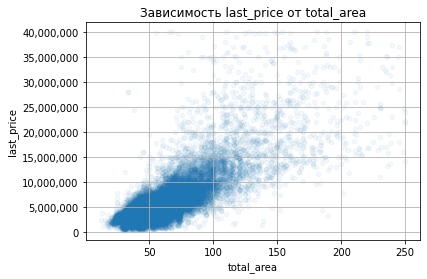

Коэффициент корреляции = 0.78


In [261]:
#'total_area'
column = 'total_area'
ax = good_data.plot(kind='scatter', x=column, y='last_price', grid=True, alpha=0.05, title='Зависимость last_price от '+column)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

columns_correlation[column] = good_data[['last_price', column]].corr().loc['last_price',column]
print('Коэффициент корреляции =',round(columns_correlation[column],2))

Цена неплохо коррелирует с полной площадью квартиры.

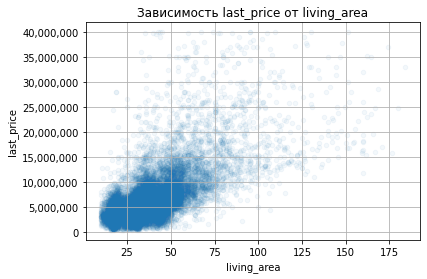

Коэффициент корреляции = 0.69


In [262]:
#'living_area'
column = 'living_area'
ax = good_data.plot(kind='scatter', x=column, y='last_price', grid=True, alpha=0.05, title='Зависимость last_price от '+column)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

columns_correlation[column] = good_data[['last_price', column]].corr().loc['last_price',column]
print('Коэффициент корреляции =',round(columns_correlation[column],2))

Немного ниже цена коррелирует с жилой площадью, общая площадь важнее

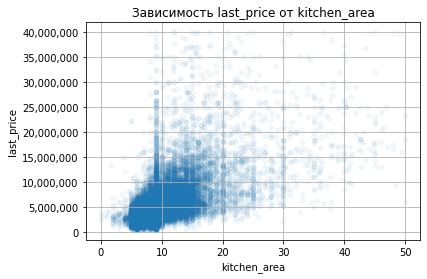

Коэффициент корреляции = 0.57


In [263]:
#'kitchen_area'
column = 'kitchen_area'
ax = good_data.plot(kind='scatter', x=column, y='last_price', grid=True, alpha=0.05, title='Зависимость last_price от '+column)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

columns_correlation[column] = good_data[['last_price', column]].corr().loc['last_price',column]
print('Коэффициент корреляции =',round(columns_correlation[column],2))

Еще меньше стоимость зависит от площади кухни, но в целом по всем трем видам площадей картина в целом похожа - есть тенденция к увеличению цены квартиры с ростом площади, однако для небольших и средних квартир есть много прочих влияющих на цену факторов

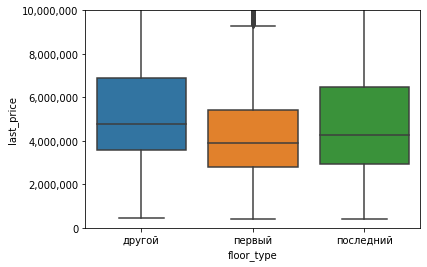

In [264]:
#'floor_type'
column = 'floor_type'

# построим диаграмму
plt.ylim([0,10000000])
ax = sb.boxplot(x=column, y="last_price", data=good_data)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
columns_correlation[column]='первый этаж - дешевле, другой - дороже'

Видна зависимость стоимости квартир от типа этажа. Квартиры на первых этажах, в целом, дешевле остальных. Дороже всего оцениваются квартиры на средних этажах.

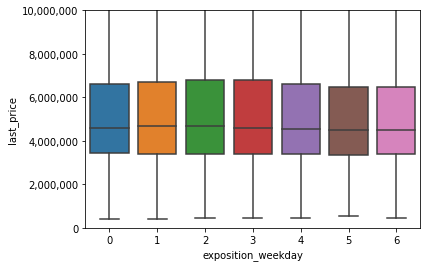

In [265]:
#'exposition_weekday'
column = 'exposition_weekday'

# построим диаграмму
plt.ylim([0,10000000])
ax = sb.boxplot(x=column, y="last_price", data=good_data)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
columns_correlation[column]='нет влияния'

День размещения объявления никак не влияет на стоимость продажи.

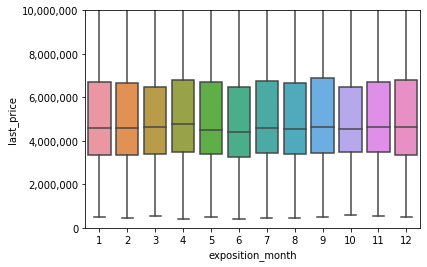

In [266]:
#'exposition_month'
column = 'exposition_month'

# построим диаграмму
plt.ylim([0,10000000])
ax = sb.boxplot(x=column, y="last_price", data=good_data)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
columns_correlation[column]='практически нет влияния'

Незначительная флуктуация цены продажи заметна в течение года. Дороже всего продаются квартиры, размещенные в апреле. С учетом среднего срока продажи 95 дней, их ориантировочно продают в июле-августе.

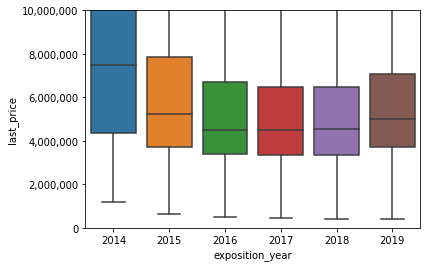

In [267]:
#'exposition_year'
column = 'exposition_year'

# построим диаграмму
plt.ylim([0,10000000])
ax = sb.boxplot(x=column, y="last_price", data=good_data)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
columns_correlation[column]='до 2017 цена падает, после - растет'

От года к году цена может меняться в значительных пределах, с 2014 года цены сильно упали, начиная с 2018 наметился небольшой рост.

##### Промежуточные выводы

Для числовых полей посчитаны коэффициенты корреляции, для нечисловых - дано текстовое описание взможного влияния. Видно, что площадь квартиры влияет на стоимость. Также влияние оказывает и этаж расположения - первый подешевле, этаж в середине - подороже. Сроки размещения практически не влияют на стоимость, единственное - квартиры, выставляемые на продажу весной, обычно немного продаются. Стоимость сильно зависит от года размещения объявления, т.к. отражает общую ситуацию с рынком недвижимости.

In [268]:
columns_correlation = pd.DataFrame( columns_correlation.items(), columns=['parameter', 'correlation'])
display(columns_correlation)

,parameter,correlation
0,total_area,0.78
1,living_area,0.69
2,kitchen_area,0.57
3,floor_type,"первый этаж - дешевле, другой - дороже"
4,exposition_weekday,нет влияния
5,exposition_month,практически нет влияния
6,exposition_year,"до 2017 цена падает, после - растет"


---
#### Задание 3: средняя цена квадратного метра в населенных пунктах

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [269]:
# найдем Топ-10 населенных пунктов по количеству объявлений
# используем поле locality_name_corrected

top_ten_locations = list((good_data['locality_name_corrected'].value_counts().head(10).keys()))
print(top_ten_locations)

# сведем сводную цен по Топ-10 локаций
top_ten_locations_pivot = good_data.query('locality_name_corrected in @top_ten_locations').pivot_table(index='locality_name_corrected', values='price_per_m2', aggfunc=['median'])
top_ten_locations_pivot.columns = ['median_price_m2']

display(top_ten_locations_pivot.sort_values(by='median_price_m2'))
 

['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг']


,median_price_m2
locality_name_corrected,
Выборг,58158.32
Всеволожск,65789.47
Гатчина,67860.57
Колпино,74722.22
Шушары,76876.17
Мурино,86119.40
Парголово,91642.86
Кудрово,95675.47
Пушкин,99993.59


---
##### Промежуточные выводы

Самая низкая цена за квадрат - в **Выборге (58 158 рублей)**, самая высокая - в **Санкт-Петербурге (104 411 рублей)**

---
#### Задание 4: как стоимость объектов зависит от расстояния до центра города

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:title={'center':'Медианная цена квартир по удаленности от центра'}, xlabel='cityCenters_nearest_km'>

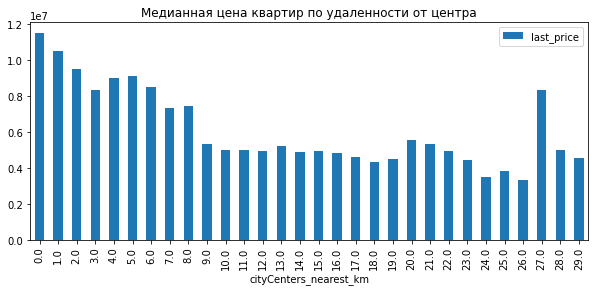

In [270]:
# cityCenters_nearest_km
# locality_name_corrected

prices_per_km = good_data.query('locality_name_corrected == "Санкт-Петербург"').pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='median')
display(prices_per_km.plot(kind='bar', figsize= (10,4), title='Медианная цена квартир по удаленности от центра'))


---
##### Промежуточные выводы

На графике видно, что расстояние до центра города сильно влияет на стоиомсть квартир, вплоть до расстояния 9 километров. На таком расстоянии от центра цена падает вдвое. С дальнейшим увеличением расстояния такого значительного падения не происходит, цены выравниваются примерно на одном уровне

### Общий вывод

Проведен анализ рынка недвижимости Ленинградской области на основании предоставленной выгрузки из базы Yandex.Недвижимость

---

***Качество исходных данных***

Датафрейм содержит значительное количество пропусков. Описание полей имеется, так что структура данных ясна.  

Все возможные пропуски заполнены. В рамках заполнения пришлось удалить небольшое количество строк из-за присутствующих в них пропусков. Остальные пропуска удалось заменить на подходящие в том или ином случае значения. ***Исключение - столбцы с геоданными***. Очень по многим строкам этой информации нет в принципе, так что пришлось отмаркировать эти строки в столбце is_bad_geoda и оставить в выборке. 

Удалось сформировать список потенциальных причин пропуска данных:

- пользователи могут не указывать всевозможную информацию - этажность дома, количество балконов.
- проблемы при сборе геоинформации для определенных городов, например для посёлок `Мурино` или `Всеволожск`. Возможно, для этих городов не может быть определена геолокация пользователя или невозможно выбрать адрес помещения на сайте. Данную проблему необходимо передать разработчикам для дальнейших прояснений.
- для полей с расстоянием до ближайшего парка и пруда не фиксируется расстояние, если расстояние до ближайшего более 3200 метров.


Явных дубликатов в датасете не обнаружилось, однако было небольшое количество неявных дубликатов в названиях населенных пунктов. В общей сложности было исправлено 59 дубликатов названий и количество уникальных населенных пунктов снизилось с 364 до 305.  

В выборке присутствовало определенно количество данных, которые можно признать выбросами. Проверке и корректировке подверглись столбцы `last_price, rooms, ceiling_height, floors_total, total_area, living_area, kitchen_area, airports_nearest`. Из-за выбросов в которых в общей сложности было удалено чуть больше 300 строк.

---
**Срез по рынку недвижимости**

Удалось сформировать срез по рынку недвижимости Ленинградской области. Он выглядит следующим образом:

- ***Площадь квартир в основном от 40 до 69 м2***, медианное значение - 52м2.
- Площадь жилих зон в основном от 19 до 42 м2, медианное значение - 30м2.
- Площадь кухонь в основном от 7 до 11м2, но есть и выдающиеся варианты в 50м2
- Цена варьируются от 430т.р. до 40 миллионов, но ***самые продаваемые - в диапазоне от 3,4 до 6,7 миллиона***
- На первом месте по количеству - ***однокомнатные квартиры*** (8190 предложений), немного меньше двухкомнатных (7882), далее трехкомнатные (5728). Четырех и более комнатные варианты представлены гораздо меньше
- Основная высота потолков - 2.6 - 2.7 метра
- В основном продают квартиры на 1-5х этажах, причем ***квартир на первом этаже предлагается значительно больше***, чем на любом другом. Квартиры на этаже выше пятого также продают, но в значительно меньших количествах.
- Почти 3/4 всех предложений на промежуточных этажах. Остальные предложения поровну делятся между первыми и последними этажами
- Квартиры предлагаются в домах разной этажности, в основном до 25 этажек. При этом явно ***лидируют 5-ти и 9-ти этажные дома***.
- Средняя отдаленность от центра на 11-16 километров. Совсем удаленное жилье, на 20 и более километров встречается гораздо реже.
- В основном квартиры расположены в 18-37 километрах от аэропорта.
- Около 44% квартир имеют как минимум 1 парк в радиусе шаговой доступности. При этом, если парк есть, то он почти всегда будет относительно близко - в радиусе 1000 метров
- Самые "горячие" месяца по размещению объявлений - февраль и март, затишье - в январе и мае.
- ***Обычно продажа занимает 95 дней***, при этом необычайно быстро будет продать быстрее, чем за 17 дней. Самые неудачные варианты могут продаваться более 454 дня
- площадь квартиры влияет на стоимость. 
- Этаж имеет значение - первый подешевле, этаж в середине - подороже. С
- День размещения не влияет на стоимость
- Объявления в апреле имеют чуть больший шанс быть проданными подороже, обычно немного продаются. 
- Стоимость сильно зависит от года размещения объявления, т.к. отражает общую ситуацию с рынком недвижимости.
- cамая низкая цена за квадрат - в ***Выборге (58 158 рублей)***, самая высокая - в ***Санкт-Петербурге (104 411 рублей)***

---

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод